## Homework 6

In [127]:
import numpy as np
import matplotlib.pyplot as plt

## Problem 1

In [128]:
import scipy.signal as ss

def conv2Dd_(image,W,stride,Conv):
    if (Conv):
        y = ss.convolve2d(image, W, mode='valid') ## valid padding
    else:
        y = ss.correlate2d(image, W, mode='valid') ## valid padding
    Xdim = len(image[0])//stride
    x = np.zeros([Xdim,Xdim],float)
    if stride>1: ## implement stride
        for i in range(0,Xdim):
            for j in range(0,Xdim):
                x[i,j] = y[i*stride,j*stride]
    else:
        x = y
    return x

In [129]:
def conv2d(image, W, stride, conv):
    if (conv):
        W = np.flipud(np.fliplr(W))
    Xdim = (len(image) - len(W)) // stride + 1
    X = np.zeros([Xdim,Xdim],float)
    for i in range(0, Xdim):
        for j in range(0, Xdim):
            value = 0

            start_x = i * stride
            start_y = j * stride

            for w_i in range(0, len(W)):
                for w_j in range(0, len(W[0])):
                    value += W[w_i][w_j] * image[start_x + w_i, start_y + w_j]

            X[i, j] = value
    
    return X

In [130]:
f = np.zeros((7, 7))
f[3, 3] = 1

g = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

print("CONVOLUTION")
print(f"Given Convolution Result:\n {conv2Dd_(f, g, 1, True)}")
print(f"Our Convolution Function:\n {conv2d(f, g, 1, True)}")

print("\nCORRELATION")
print(f"Given Correlation Result:\n {conv2d(f, g, 1, False)}")
print(f"Our Correlation Result:\n {conv2Dd_(f, g, 1, False)}")

CONVOLUTION
Given Convolution Result:
 [[0. 0. 0. 0. 0.]
 [0. 1. 2. 3. 0.]
 [0. 4. 5. 6. 0.]
 [0. 7. 8. 9. 0.]
 [0. 0. 0. 0. 0.]]
Our Convolution Function:
 [[0. 0. 0. 0. 0.]
 [0. 1. 2. 3. 0.]
 [0. 4. 5. 6. 0.]
 [0. 7. 8. 9. 0.]
 [0. 0. 0. 0. 0.]]

CORRELATION
Given Correlation Result:
 [[0. 0. 0. 0. 0.]
 [0. 9. 8. 7. 0.]
 [0. 6. 5. 4. 0.]
 [0. 3. 2. 1. 0.]
 [0. 0. 0. 0. 0.]]
Our Correlation Result:
 [[0. 0. 0. 0. 0.]
 [0. 9. 8. 7. 0.]
 [0. 6. 5. 4. 0.]
 [0. 3. 2. 1. 0.]
 [0. 0. 0. 0. 0.]]


## Problem 2

In [131]:
Image_dim = 7
stride = 2
Ydim = 3
Wdim = 3
##
## target
##
target = np.array([[1,0,0],[1,0,0],[1,0,0],[0,1,0],[0,1,0],[0,1,0],[0,0,1],[0,0,1],[0,0,1]],float)
##

##
## 0
## this is a form that is easier to work with, the other form works too
image7by7 = np.zeros([9,Image_dim,Image_dim],float)
image7by7[0,1,:] = np.array([0,0,0,1,0,0,0])
image7by7[0,2,:] = np.array([0,0,1,1,0,0,0])
image7by7[0,3,:] = np.array([0,0,0,1,0,0,0])
image7by7[0,4,:] = np.array([0,0,0,1,0,0,0])
image7by7[0,5,:] = np.array([0,0,1,1,1,0,0])
## 1
image7by7[1,1,:] = np.array([0,0,1,1,0,0,0])
image7by7[1,2,:] = np.array([0,0,0,1,0,0,0])
image7by7[1,3,:] = np.array([0,0,0,1,0,0,0])
image7by7[1,4,:] = np.array([0,0,0,1,0,0,0])
image7by7[1,5,:] = np.array([0,0,0,1,0,0,0])
## 2
image7by7[2,1,:] = np.array([0,0,0,1,0,0,0])
image7by7[2,2,:] = np.array([0,0,0,1,0,0,0])
image7by7[2,3,:] = np.array([0,0,0,1,0,0,0])
image7by7[2,4,:] = np.array([0,0,0,1,0,0,0])
image7by7[2,5,:] = np.array([0,1,1,1,1,1,0])
## 3
image7by7[3,1,:] = np.array([0,1,1,1,1,1,0])
image7by7[3,2,:] = np.array([0,1,0,0,1,0,0])
image7by7[3,3,:] = np.array([0,0,0,1,0,0,0])
image7by7[3,4,:] = np.array([0,1,1,0,0,0,0])
image7by7[3,5,:] = np.array([0,1,1,1,1,1,0])
## 4
image7by7[4,1,:] = np.array([0,0,1,1,1,0,0])
image7by7[4,2,:] = np.array([0,0,0,0,1,0,0])
image7by7[4,3,:] = np.array([0,0,0,1,0,0,0])
image7by7[4,4,:] = np.array([0,0,1,0,0,0,0])
image7by7[4,5,:] = np.array([0,0,1,1,1,0,0])
## 5
image7by7[5,1,:] = np.array([0,0,1,1,0,0,0])
image7by7[5,2,:] = np.array([0,1,0,0,1,0,0])
image7by7[5,3,:] = np.array([0,0,0,1,0,0,0])
image7by7[5,4,:] = np.array([0,0,1,0,0,0,0])
image7by7[5,5,:] = np.array([0,1,1,1,1,1,0])
## 6
image7by7[6,1,:] = np.array([0,1,1,1,1,1,0])
image7by7[6,2,:] = np.array([0,1,0,0,0,1,0])
image7by7[6,3,:] = np.array([0,0,1,1,1,1,0])
image7by7[6,4,:] = np.array([0,0,0,0,0,1,0])
image7by7[6,5,:] = np.array([0,1,1,1,1,1,0])
## 7
image7by7[7,1,:] = np.array([0,0,1,1,1,0,0])
image7by7[7,2,:] = np.array([0,1,0,0,0,1,0])
image7by7[7,3,:] = np.array([0,0,0,1,1,0,0])
image7by7[7,4,:] = np.array([0,1,0,0,0,1,0])
image7by7[7,5,:] = np.array([0,0,1,1,1,0,0])
## 8
image7by7[8,1,:] = np.array([0,1,1,1,1,1,0])
image7by7[8,2,:] = np.array([0,1,0,0,0,1,0])
image7by7[8,3,:] = np.array([0,0,0,1,1,1,0])
image7by7[8,4,:] = np.array([0,1,0,0,0,1,0])
image7by7[8,5,:] = np.array([0,1,1,1,1,1,0])
## print('image 1 \n', image7by7)
##
## test data
##
targett = np.array([[1,0,0],[0,0,1],[0,1,0]],float)
##
image7by7t = np.zeros([3,7,7],float)
image7by7t[0,1,:] = np.array([0,0,0,1,0,0,0])
image7by7t[0,2,:] = np.array([0,0,0,1,0,0,0])
image7by7t[0,3,:] = np.array([0,0,0,1,0,0,0])
image7by7t[0,4,:] = np.array([0,0,0,1,0,0,0])
image7by7t[0,5,:] = np.array([0,0,0,1,1,0,0])
## print('image 1 \n', image7by7t0)
image7by7t[1,1,:] = np.array([0,0,1,1,1,0,0])
image7by7t[1,2,:] = np.array([0,1,0,0,0,1,0])
image7by7t[1,3,:] = np.array([0,0,0,1,1,1,0])
image7by7t[1,4,:] = np.array([0,1,0,0,0,1,0])
image7by7t[1,5,:] = np.array([0,0,1,1,1,0,0])
## print('image 1 \n', image7by7t1)

## test image a 2
image7by7t[2,1,:] = np.array([0,0,1,1,1,1,0])
image7by7t[2,2,:] = np.array([0,1,0,0,1,0,0])
image7by7t[2,3,:] = np.array([0,0,0,1,0,0,0])
image7by7t[2,4,:] = np.array([0,0,1,0,0,0,0])
image7by7t[2,5,:] = np.array([0,1,1,1,1,1,0])
##
## reverse order columns 

In [132]:
def normalize_dataset(train_images, test_images):
    train_mean = np.mean(train_images)
    train_std = np.std(train_images)
    
    if train_std == 0:
        train_std = 1
    
    normalized_train = (train_images - train_mean) / train_std
    normalized_test = (test_images - train_mean) / train_std
    
    return normalized_train, normalized_test

def standardize_image(image):
    mean = np.mean(image)
    std = np.std(image)
    if std == 0:
        return image - mean  # Avoid division by zero
    return (image - mean) / std

# image7by7, image7by7t = normalize_dataset(image7by7, image7by7t)

In [133]:
W1 = np.array([[ 1.6975548, -0.07326141, -0.41880725],
                [ 0.12228276, -0.19572004, 0.81986898],
                [ 0.8876136, -1.8629187, -0.97661273]]
            )

W2 = np.array([ 1.10485759, 0.2120758, -1.31693339])

def categorize(X):
    XX = np.zeros(len(X),float)
    maxind = X.tolist().index(max(X.tolist()))
    XX[maxind] = 1.0
    return(XX)

def model(image, W1, W2):
    # CNN
    convolution = conv2d(image, W1, 2, True)    
    # ANN
    return categorize(convolution @ W2)

print("TRAINING DATA")
for i, image in enumerate(image7by7):
    image = standardize_image(image)
    pred = model(image, W1, W2)
    t = target[i]
    cost += np.sum((pred - t) ** 2)
    print(f"prediction: {pred}, target: {t}")

print("\nTEST DATA")
for i, image in enumerate(image7by7t):
    image = standardize_image(image)
    pred = model(image, W1, W2)
    t = targett[i]
    print(f"prediction: {pred}, target: {t}")

TRAINING DATA
prediction: [1. 0. 0.], target: [1. 0. 0.]
prediction: [1. 0. 0.], target: [1. 0. 0.]
prediction: [1. 0. 0.], target: [1. 0. 0.]
prediction: [0. 1. 0.], target: [0. 1. 0.]
prediction: [0. 1. 0.], target: [0. 1. 0.]
prediction: [0. 1. 0.], target: [0. 1. 0.]
prediction: [0. 0. 1.], target: [0. 0. 1.]
prediction: [0. 0. 1.], target: [0. 0. 1.]
prediction: [0. 0. 1.], target: [0. 0. 1.]

TEST DATA
prediction: [1. 0. 0.], target: [1. 0. 0.]
prediction: [0. 0. 1.], target: [0. 0. 1.]
prediction: [0. 1. 0.], target: [0. 1. 0.]


## Problem 3

TRAINING DATA
prediction: [1. 0. 0.], target: [1. 0. 0.]
prediction: [1. 0. 0.], target: [1. 0. 0.]
prediction: [1. 0. 0.], target: [1. 0. 0.]
prediction: [0. 1. 0.], target: [0. 1. 0.]
prediction: [0. 1. 0.], target: [0. 1. 0.]
prediction: [0. 1. 0.], target: [0. 1. 0.]
prediction: [0. 0. 1.], target: [0. 0. 1.]
prediction: [0. 0. 1.], target: [0. 0. 1.]
prediction: [0. 0. 1.], target: [0. 0. 1.]
TEST DATA
prediction: [1. 0. 0.], target: [1. 0. 0.]
prediction: [0. 0. 1.], target: [0. 0. 1.]
prediction: [0. 1. 0.], target: [0. 1. 0.]


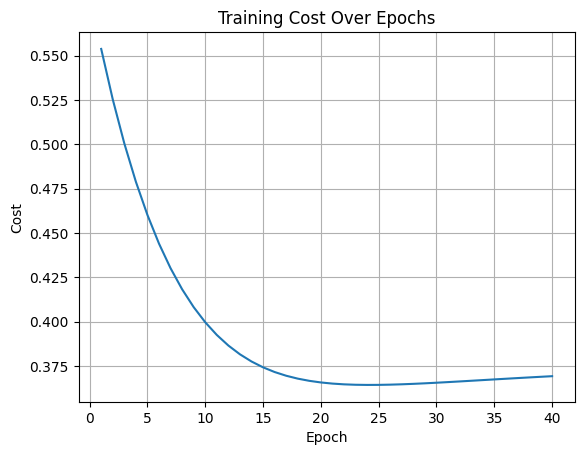

W1
[[-0.05802252  0.18287379 -0.52567485]
 [-0.25571495 -0.43130365 -0.51374313]
 [-0.35434941 -0.1729434  -0.1910372 ]]
W2
[[ 0.08778155 -0.19894582  0.31956074]]


In [134]:
# initialize weights
np.random.seed(1)
W1 = (np.random.rand(Wdim,Wdim)-0.5)
# print(W1)
W2 = (np.random.rand(Wdim, 1)-0.5)
# print(W2)

ALPHA = 0.001

def dz_dw1(pred, target, W2, image):
    dz_dx2 = 2 * (pred - target)
    return conv2d(image, dz_dx2 @ W2.T, 2, True)

def dz_dw2(convolution, pred, target):
    return 2 * convolution.T @ (pred - target)

costs = []
for i in range(40):
    cost = 0
    for i, image in enumerate(image7by7):
        image = standardize_image(image)
        convolution = conv2d(image, W1, 2, False)
        pred = convolution @ W2
        t = target[i].reshape(3, 1)

        cost += np.sum((pred - t) ** 2)

        dw2 = dz_dw2(convolution, pred, t)
        dw1 = dz_dw1(pred, t, W2, image)

        W2 -= ALPHA * dw2
        W1 -= ALPHA * dw1


    cost /= len(target)
    costs.append(cost)

print("TRAINING DATA")
for i, image in enumerate(image7by7):
    # pred = model(image, W1, W2)
    convolution = conv2d(image, W1, 2, False)
    pred = categorize(convolution @ W2)
    t = target[i]
    print(f"prediction: {pred}, target: {t}")

print("TEST DATA")
for i, image in enumerate(image7by7t):
    # pred = model(image, W1, W2)
    convolution = conv2d(image, W1, 2, False)
    pred = categorize(convolution @ W2)
    t = targett[i]
    print(f"prediction: {pred}, target: {t}")

plt.plot(range(1, len(costs) + 1), costs)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Training Cost Over Epochs')
plt.grid(True)
plt.show()

print("W1")
print(W1)

print("W2")
print(W2.reshape(1, 3))